In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from speednav import utilities as util
import datetime
import networkx as nx

In [3]:
# load the SPEED data
data = util.load_data()

# load the dictionary with the variable names and decriptions
data_vars  = util.DATA_VARS

### Filter data for country or other variable values

In [4]:
country_name = 'Liberia' # 'Sierra Leone', 'Philippines', 'Liberia' 
data_country = util.filter_data(data, country_name)
data_filter = data_country#.loc[(data_country.O0001 != 13)]

### Set some network parameters

In [9]:
node_name = 'index'
edge_name_list = ['INI0005_1', 'INI0005_2', 'INI0005_3', 'INI0005_4', 'INI0005_5']
return_df = True # True is needed for networkx, False is needed for graph-tool

### Calculate the edge list from the data

In [10]:
edge_list = util.construct_edge_list_multivar(data_filter, node_name, edge_name_list, return_df=return_df)
print(edge_list)

    source  target
0   4978.0  4979.0
1   4979.0  4980.0
2   4980.0  4981.0
3   4981.0  4982.0
4   4982.0  4983.0
..     ...     ...
4   4982.0  4983.0
5   4983.0  4984.0
6   4984.0  4985.0
0   4979.0  4980.0
0   4977.0  4978.0

[905478 rows x 2 columns]


### Calculate the network using networkx

In [12]:
network = nx.from_pandas_edgelist(edge_list, source='source', target='target')

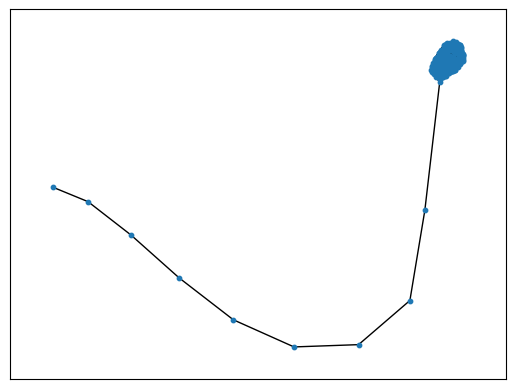

In [13]:
nx.draw_networkx(network, with_labels=False, node_size=10)